In [1]:
using DataFrames
using Plots
using StatPlots
import CSV

In [2]:
const data_path = "data/toy_data"

{S}, Base.Nullable{T}) in module Base at nullable.jl:238 overwritten in module NullableArrays at C:\Users\Hamza El-Saawy\.julia\v0.6\NullableArrays\src\operators.jl:99

"data/toy_data"

.

In [34]:
reverse_ind(1, 2)

1

In [3]:
# load
#

include("src/CHMM.jl")

dfX = CSV.read(joinpath(data_path, "X.csv"), header=true, nullable=false)
Xfull = Matrix(dfX)
X = Matrix(dfX[[:velocity, :mindistance, :acceleration]])'

trajptr = readcsv(joinpath(data_path, "traj_ptr.csv"), Int) |> vec
pairsfull, _ = readcsv(joinpath(data_path, "pairs.csv"), Int, header=true)
pairsfull = pairsfull'
;

In [4]:
n_trajs = length(trajptr) - 1
n_pairs = size(pairsfull, 2)
n_obs = size(X, 2)

1885908

# Plot


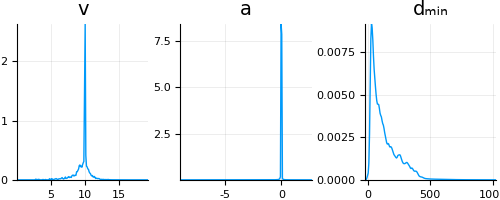

In [17]:
plot(
    plot(dfX[:velocity], seriestype=:density, title="v"),
    plot(dfX[:acceleration], seriestype=:density, title="a"),
    plot(dfX[:mindistance], seriestype=:density, title="dₘᵢₙ"),
    layout=(1, 3), legend=false, size=(500, 200)
)


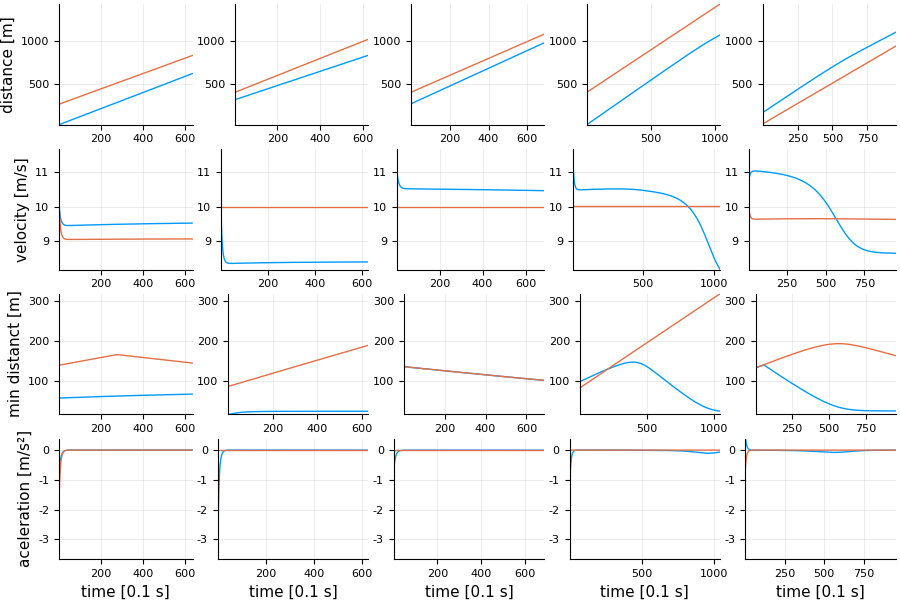

In [14]:
n_plot = 5
pairs_to_plot = randperm(n_pairs)[1:n_plot]
plts = Matrix{Any}(n_plot, 4)

for (i, p) in enumerate(pairs_to_plot)
    X1, X2 = get_pair_from_ptr(Xfull, pairsfull, p)
    
    plts[i, 1] = plot([X1[1, :] X2[1, :]],)
    plts[i, 2] = plot([X1[2, :] X2[2, :]],)
    plts[i, 3] = plot([X1[3, :] X2[3, :]],)
    plts[i, 4] = plot([X1[4, :] X2[4, :]],)
end
[xlabel!(plts[i, end], "time [0.1 s]") for i in 1:n_plot]
[ylabel!(plts[1, i], s) for (i, s) in 
        enumerate(["distance [m]", "velocity [m/s]", "min distanct [m]", "aceleration [m/s²]"])]
plot((plts)..., legend=false, layout=(4, n_plot), link=:both, size=(900,600))

# CHMM

In [18]:
X = X .* [1, 1, 100] # scaling issue for acceleration
;

In [22]:
K = 3
curr = chmm_from_data(X, K)
orig_est = deepcopy(curr)
suff = ChmmSuffStats(curr)
;

In [23]:
(curr, loglike_hist) = chmm_em!(curr, suff, X, trajptr, pairsfull; N_iters=50, print_every=10)
;

iteration     10:  -38660097.015
iteration     20:  -25631966.095
iteration     30:  -44841243.474
iteration     40:  -43413408.325
iteration     50:  -35947881.894
